In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# create the nodes and distances
nodes = 25 
l1_distances=np.zeros(shape = (nodes,nodes)) 
lmax_distances =np.zeros(shape = (nodes,nodes))

#import the nodes coordinations
data = pd.read_excel("/Users/thanhthaopro/Downloads/hw6 p4 coordinates.xlsx")
data.head(5)

,Node,X-coordinate,Y-coordinate
0,0,50,50
1,1,11,43
2,2,56,22
3,3,35,20
4,4,33,48


In [16]:
# create the list of coordinates
coordinates_list = []

for i in range(len(data)):
    coordinates_list.append(np.array(data.iloc[i,1:]))
 

In [17]:
for i in range(len(coordinates_list)):
    for j in range(len(coordinates_list)):
        distl1 = abs(coordinates_list[i]-coordinates_list[j]).sum()
        l1_distances[i][j] = distl1
        distl_infinity = max(abs(coordinates_list[i]-coordinates_list[j]))
        lmax_distances[i][j] = distl_infinity

In [18]:
MHT_distances = l1_distances
CBS_distances = lmax_distances

In [19]:
# Manhattan with Nearest Neighbor and Cheapest Insertion
#Nearest neightbor Heuristics
def NN_initiate():
    tour = [0]
    unvisits = list(np.arange(25))
    unvisits.remove(0) #as 0 is beginning
    return tour, unvisits

In [20]:
def Next_NN(current_node,unvisited_list, tour, distance='MHT'):
    try:
        if distance=='MHT':
            cost_metrics = MHT_distances
        elif distance=='CBS':
            cost_metrics = CBS_distances
        nearest_val = 9999
        # nearest neighbor - NN
        NN = 99999
        for cust in unvisited_list:
            #print(manh_distances[current_node,cust])
            if cost_metrics[current_node,cust]<nearest_val:
                nearest_val=cost_metrics[current_node,cust]
                NN=cust

        tour.append(NN)
        unvisited_list.remove(NN)
        #print(nearest_neighbor)
    except:
        print('came to end of list')
        NN=0
        tour.append(NN)
        print(tour)
    return nearest_val, NN, tour, unvisited_list

In [21]:
# Cheapest Insertion Heuristics
def Cheapest_insertion_initiate():
    tour = [0]
    unvisits = list(np.arange(25))
    unvisits.remove(0) #as 0 is beginning
    return tour, unvisits

In [22]:
def get_tour_cost(tour,cost_metrics):
    
    tour_cost = []
    tour_modified = tour.copy()
    tour_modified.append(0)
    #print(tour_modified)
    
    start = 0
    for i in range(len(tour_modified)-1):
        
        tour_cost.append(cost_metrics[tour_modified[start],tour_modified[start+1]])
        start = start +1
        
    #print(sum(tour_cost))
    Total_tour_cost=sum(tour_cost)    
    return Total_tour_cost

In [23]:
def Next_cheapest_insertion(unvisits, pairs,tour, distance='MHT' ):
    if distance=='MHT':
            cost_metrics = MHT_distances
    elif distance=='CBS':
            cost_metrics = CBS_distances
    
    #setting up global values 
    insertion_global_min = 9999
    insertion_global_start = 9999
    insertion_global_end = 9999
    insertion_global_cust = 9999
      
    for pair in pairs : 
        start = pair[0]
        end = pair[1]
        
        cij=cost_metrics[start,end]
        
        insertion_min = 9999999
        least_expensive_cust = 999999
        for cust in unvisits:
            cik = cost_metrics[start,cust]
            ckj = cost_metrics[cust, end]
            insertion_cost = cik+ckj - cij
            
            if insertion_cost < insertion_min:
                insertion_min=insertion_cost
                least_expensive_cust = cust
                
        if insertion_min<insertion_global_min:
            insertion_global_min=insertion_min
            insertion_global_start = start
            insertion_global_end = end
            insertion_global_cust = least_expensive_cust
    
    #create this new pair which cuts existing 
    pairs_created =[[insertion_global_start, insertion_global_cust], [insertion_global_cust, insertion_global_end] ]
    
    #remove visited customer now
    unvisits.remove(insertion_global_cust)
    
    insertion_loc = tour.index(insertion_global_start)

    #2. insert new customer there after this and create new tour list
    tour.insert(insertion_loc+1, insertion_global_cust)    
    
    Total_tour_cost=get_tour_cost(tour,cost_metrics)
    
    print(tour+[0], ' \t cost= {}'.format(Total_tour_cost))
     
    return   pairs_created, unvisits, tour, Total_tour_cost            

In [24]:
# Applying Manhattan Metric
tour, unvisited_list= NN_initiate()
print("\n\nCost Iterations : ")
All_nearest= []
for i in range(24):
    nearest_val, NN, tour, unvisited_list= Next_NN(tour[-1], unvisited_list,tour, distance='MHT')
    All_nearest.append(nearest_val)
    print(tour)
tour.append(0)
print(tour)

#hidden
All_nearest.append(MHT_distances[NN,0])

print('\nNearest Neighbor Traveling Cost by Manhattan Metric : {}'.format(sum(All_nearest)))

#-----------------------------------------------------------------------------------------------------
print("Cost Iterations : ")
tour, unvisits=Cheapest_insertion_initiate()
pairs= [[0,0]]

for i in range(24):
    pairs, unvisits, tour, Total_tour_cost= Next_cheapest_insertion(unvisits, pairs, tour,distance='MHT')
    
print('\nCheapest Insertion Traveling Cost by Manhattan Metric : {}'.format(Total_tour_cost))



Cost Iterations : 
[0, 4]
[0, 4, 22]
[0, 4, 22, 9]
[0, 4, 22, 9, 8]
[0, 4, 22, 9, 8, 7]
[0, 4, 22, 9, 8, 7, 5]
[0, 4, 22, 9, 8, 7, 5, 11]
[0, 4, 22, 9, 8, 7, 5, 11, 20]
[0, 4, 22, 9, 8, 7, 5, 11, 20, 6]
[0, 4, 22, 9, 8, 7, 5, 11, 20, 6, 12]
[0, 4, 22, 9, 8, 7, 5, 11, 20, 6, 12, 17]
[0, 4, 22, 9, 8, 7, 5, 11, 20, 6, 12, 17, 24]
[0, 4, 22, 9, 8, 7, 5, 11, 20, 6, 12, 17, 24, 2]
[0, 4, 22, 9, 8, 7, 5, 11, 20, 6, 12, 17, 24, 2, 3]
[0, 4, 22, 9, 8, 7, 5, 11, 20, 6, 12, 17, 24, 2, 3, 14]
[0, 4, 22, 9, 8, 7, 5, 11, 20, 6, 12, 17, 24, 2, 3, 14, 19]
[0, 4, 22, 9, 8, 7, 5, 11, 20, 6, 12, 17, 24, 2, 3, 14, 19, 16]
[0, 4, 22, 9, 8, 7, 5, 11, 20, 6, 12, 17, 24, 2, 3, 14, 19, 16, 18]
[0, 4, 22, 9, 8, 7, 5, 11, 20, 6, 12, 17, 24, 2, 3, 14, 19, 16, 18, 1]
[0, 4, 22, 9, 8, 7, 5, 11, 20, 6, 12, 17, 24, 2, 3, 14, 19, 16, 18, 1, 10]
[0, 4, 22, 9, 8, 7, 5, 11, 20, 6, 12, 17, 24, 2, 3, 14, 19, 16, 18, 1, 10, 13]
[0, 4, 22, 9, 8, 7, 5, 11, 20, 6, 12, 17, 24, 2, 3, 14, 19, 16, 18, 1, 10, 13, 15]
[0, 4, 22, 9

In [25]:
#Applying Chebyshev Metric
tour, unvisited_list = NN_initiate()
print("\n\nCost Iterations: ")
All_nearest= []
for i in range(24):
    nearest_val, NN, tour, unvisited_list= Next_NN(tour[-1], unvisited_list,tour, distance='CBS')
    All_nearest.append(nearest_val)
    print(tour)
tour.append(0)
print(tour)

#hidden
All_nearest.append(CBS_distances[NN,0])

print('\nNearest Neighbor Traveling Cost by Chebyshev Metric: {}'.format(sum(All_nearest)))

#------------------------------------------------------------------------------------------------------
print("\n\nCost Iteration : ")
tour, unvisits = Cheapest_insertion_initiate()
pairs= [[0,0]]

for i in range(24):
    pairs, unvisits, tour, Total_tour_cost = Next_cheapest_insertion(unvisits, pairs,tour,distance='CBS')

print('\nCheapest Insesrtion Traveling Cost by Chebyshev Metric : {}'.format(Total_tour_cost))



Cost Iterations: 
[0, 22]
[0, 22, 4]
[0, 22, 4, 15]
[0, 22, 4, 15, 1]
[0, 22, 4, 15, 1, 18]
[0, 22, 4, 15, 1, 18, 10]
[0, 22, 4, 15, 1, 18, 10, 13]
[0, 22, 4, 15, 1, 18, 10, 13, 14]
[0, 22, 4, 15, 1, 18, 10, 13, 14, 3]
[0, 22, 4, 15, 1, 18, 10, 13, 14, 3, 19]
[0, 22, 4, 15, 1, 18, 10, 13, 14, 3, 19, 16]
[0, 22, 4, 15, 1, 18, 10, 13, 14, 3, 19, 16, 23]
[0, 22, 4, 15, 1, 18, 10, 13, 14, 3, 19, 16, 23, 2]
[0, 22, 4, 15, 1, 18, 10, 13, 14, 3, 19, 16, 23, 2, 24]
[0, 22, 4, 15, 1, 18, 10, 13, 14, 3, 19, 16, 23, 2, 24, 6]
[0, 22, 4, 15, 1, 18, 10, 13, 14, 3, 19, 16, 23, 2, 24, 6, 12]
[0, 22, 4, 15, 1, 18, 10, 13, 14, 3, 19, 16, 23, 2, 24, 6, 12, 17]
[0, 22, 4, 15, 1, 18, 10, 13, 14, 3, 19, 16, 23, 2, 24, 6, 12, 17, 20]
[0, 22, 4, 15, 1, 18, 10, 13, 14, 3, 19, 16, 23, 2, 24, 6, 12, 17, 20, 11]
[0, 22, 4, 15, 1, 18, 10, 13, 14, 3, 19, 16, 23, 2, 24, 6, 12, 17, 20, 11, 5]
[0, 22, 4, 15, 1, 18, 10, 13, 14, 3, 19, 16, 23, 2, 24, 6, 12, 17, 20, 11, 5, 7]
[0, 22, 4, 15, 1, 18, 10, 13, 14, 3, 19, 1

In [ ]:
#2-opt improvement heuristics
import numpy as np

def difference_penalty(penalty_matrics, n1, n2, n3, n4):
    return penalty_matrics[n1][n3] + penalty_matrics[n2][n4] - penalty_matrics[n1][n2] - penalty_matrics[n3][n4]


def kopt_improvement(tour_track, penalty_matrics):
    chosen_track = tour_track.copy()
    changed = True
    while changed:
        changed = False
        for i in range(1, len(tour_track) - 2):
            for j in range(i + 1, len(tour_track)):
                if j - i == 1: continue
                if difference_penalty(penalty_matrics, chosen_track[i - 1], chosen_track[i], chosen_track[j - 1], chosen_track[j]) < 0:
                    chosen_track[i:j] = chosen_track[j - 1:i - 1:-1]
                    changed = True
        tour_track = chosen_track
    return chosen_track

cost_mat1 = MHT_distances
cost_mat2 = CBS_distances

In [28]:
tour_Manhattan_NN = [0, 4, 22, 9, 8, 7, 5, 11, 20, 6, 12, 17, 24, 2, 3, 14, 19, 16, 18, 1, 10, 13, 15, 23, 21, 0]  
tour_Manhattan_CI = [0, 22, 9, 10, 1, 18, 16, 19, 23, 17, 12, 8, 13, 21, 7, 5, 11, 20, 6, 24, 2, 3, 14, 15, 4, 0]
tour_Chebyshev_NN = [0, 22, 4, 15, 1, 18, 10, 13, 14, 3, 19, 16, 23, 2, 24, 6, 12, 17, 20, 11, 5, 7, 8, 9, 21, 0]
tour_Chebyshev_CI = [0, 4, 15, 1, 18, 23, 21, 9, 8, 7, 5, 11, 20, 17, 12, 6, 24, 2, 3, 14, 19, 16, 13, 10, 22, 0]

In [35]:
best_route_Man_NN = kopt_improvement(tour_Manhattan_NN, cost_mat1)
best_route_Man_CI = kopt_improvement(tour_Manhattan_CI, cost_mat1)
best_route_Cheb_NN = kopt_improvement(tour_Chebyshev_NN, cost_mat2)
best_route_Cheb_CI = kopt_improvement(tour_Chebyshev_CI, cost_mat2)
print('Best Route Man_NN', best_route_Man_NN)
print('Best Route Cheb_NN', best_route_Cheb_NN)
print('Best Route Man_CI', best_route_Man_CI)
print('Best Route Cheb_CI', best_route_Cheb_CI)

Best Route Man_NN [0, 22, 9, 21, 13, 10, 1, 18, 15, 4, 14, 16, 19, 23, 3, 2, 24, 17, 12, 6, 20, 11, 5, 7, 8, 0]
Best Route Cheb_NN [0, 22, 21, 9, 8, 7, 5, 11, 20, 6, 12, 17, 24, 2, 23, 16, 19, 3, 14, 18, 13, 10, 1, 15, 4, 0]
Best Route Man_CI [0, 20, 11, 5, 7, 8, 22, 9, 21, 13, 10, 1, 18, 16, 19, 23, 17, 12, 6, 24, 2, 3, 14, 15, 4, 0]
Best Route Cheb_CI [0, 24, 17, 12, 6, 20, 11, 5, 7, 8, 9, 21, 13, 10, 1, 18, 16, 19, 23, 2, 3, 14, 15, 4, 22, 0]


In [37]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_tsp(coordinates, tour, metric="Manhattan"):
    """
    Visualize the TSP tour using NetworkX.
    
    Parameters:
        coordinates (list): List of node coordinates.
        tour (list): TSP tour (ordered list of visited nodes).
        metric (str): Distance metric used (Manhattan or Chebyshev).
    """
    G = nx.DiGraph()  # Directed graph for the tour

    # Add nodes with positions
    for i, coord in enumerate(coordinates):
        G.add_node(i, pos=(coord[0], coord[1]))
    
    # Add edges based on the tour
    for i in range(len(tour) - 1):
        G.add_edge(tour[i], tour[i + 1])
    G.add_edge(tour[-1], tour[0])  # Closing the loop
    
    # Draw the graph
    pos = nx.get_node_attributes(G, 'pos')
    plt.figure(figsize=(8, 8))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color='red', arrowsize=20)
    plt.title(f"TSP Tour Visualization ({metric} Metric)", fontsize=14)
    plt.show()

In [38]:
tour, unvisited_list = NN_initiate()
print("\n\nCost Iterations: ")
All_nearest = []
for i in range(24):
    nearest_val, NN, tour, unvisited_list = Next_NN(tour[-1], unvisited_list, tour, distance='MHT')
    All_nearest.append(nearest_val)
    print(tour)
tour.append(0)
print(tour)



Cost Iterations: 
[0, 4]
[0, 4, 22]
[0, 4, 22, 9]
[0, 4, 22, 9, 8]
[0, 4, 22, 9, 8, 7]
[0, 4, 22, 9, 8, 7, 5]
[0, 4, 22, 9, 8, 7, 5, 11]
[0, 4, 22, 9, 8, 7, 5, 11, 20]
[0, 4, 22, 9, 8, 7, 5, 11, 20, 6]
[0, 4, 22, 9, 8, 7, 5, 11, 20, 6, 12]
[0, 4, 22, 9, 8, 7, 5, 11, 20, 6, 12, 17]
[0, 4, 22, 9, 8, 7, 5, 11, 20, 6, 12, 17, 24]
[0, 4, 22, 9, 8, 7, 5, 11, 20, 6, 12, 17, 24, 2]
[0, 4, 22, 9, 8, 7, 5, 11, 20, 6, 12, 17, 24, 2, 3]
[0, 4, 22, 9, 8, 7, 5, 11, 20, 6, 12, 17, 24, 2, 3, 14]
[0, 4, 22, 9, 8, 7, 5, 11, 20, 6, 12, 17, 24, 2, 3, 14, 19]
[0, 4, 22, 9, 8, 7, 5, 11, 20, 6, 12, 17, 24, 2, 3, 14, 19, 16]
[0, 4, 22, 9, 8, 7, 5, 11, 20, 6, 12, 17, 24, 2, 3, 14, 19, 16, 18]
[0, 4, 22, 9, 8, 7, 5, 11, 20, 6, 12, 17, 24, 2, 3, 14, 19, 16, 18, 1]
[0, 4, 22, 9, 8, 7, 5, 11, 20, 6, 12, 17, 24, 2, 3, 14, 19, 16, 18, 1, 10]
[0, 4, 22, 9, 8, 7, 5, 11, 20, 6, 12, 17, 24, 2, 3, 14, 19, 16, 18, 1, 10, 13]
[0, 4, 22, 9, 8, 7, 5, 11, 20, 6, 12, 17, 24, 2, 3, 14, 19, 16, 18, 1, 10, 13, 15]
[0, 4, 22, 9,

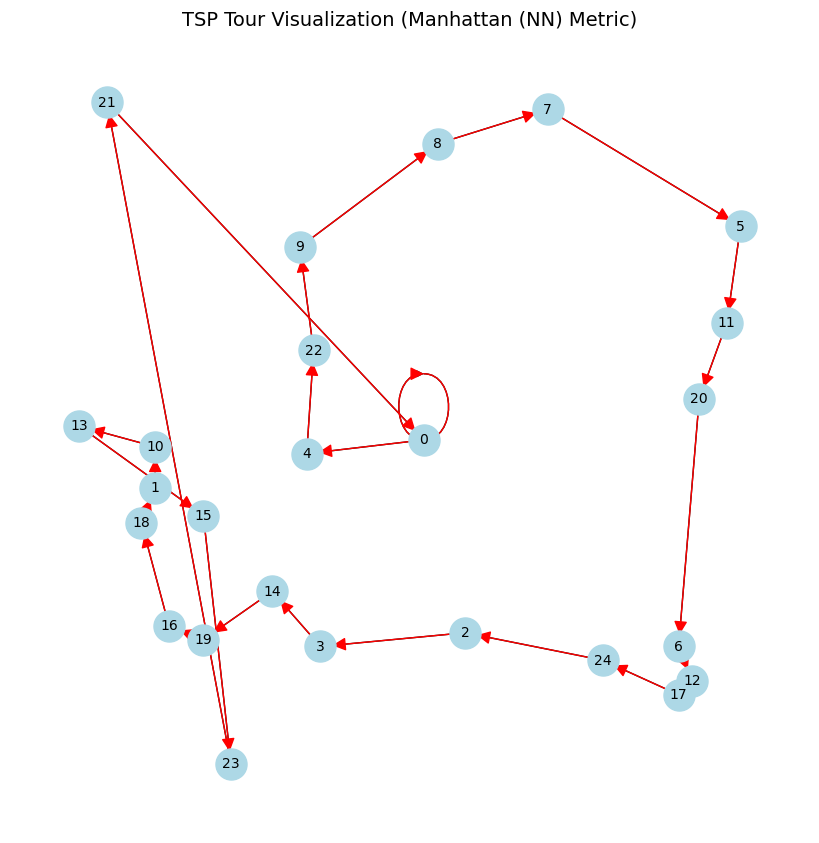

In [39]:
visualize_tsp(coordinates_list, tour, metric="Manhattan (NN)")

In [40]:
print("\n\nCost Iteration: ")
tour, unvisits = Cheapest_insertion_initiate()
pairs = [[0, 0]]

for i in range(24):
    pairs, unvisits, tour, Total_tour_cost = Next_cheapest_insertion(unvisits, pairs, tour, distance='CBS')

print('\nCheapest Insertion Traveling Cost by Chebyshev Metric: {}'.format(Total_tour_cost))



Cost Iteration: 
[0, 22, 0]  	 cost= 32.0
[0, 4, 22, 0]  	 cost= 48.0
[0, 4, 15, 22, 0]  	 cost= 72.0
[0, 4, 15, 1, 22, 0]  	 cost= 78.0
[0, 4, 15, 1, 10, 22, 0]  	 cost= 84.0
[0, 4, 15, 1, 18, 10, 22, 0]  	 cost= 94.0
[0, 4, 15, 1, 18, 13, 10, 22, 0]  	 cost= 108.0
[0, 4, 15, 1, 18, 16, 13, 10, 22, 0]  	 cost= 138.0
[0, 4, 15, 1, 18, 19, 16, 13, 10, 22, 0]  	 cost= 145.0
[0, 4, 15, 1, 18, 14, 19, 16, 13, 10, 22, 0]  	 cost= 157.0
[0, 4, 15, 1, 18, 3, 14, 19, 16, 13, 10, 22, 0]  	 cost= 172.0
[0, 4, 15, 1, 18, 23, 3, 14, 19, 16, 13, 10, 22, 0]  	 cost= 198.0
[0, 4, 15, 1, 18, 23, 2, 3, 14, 19, 16, 13, 10, 22, 0]  	 cost= 236.0
[0, 4, 15, 1, 18, 23, 24, 2, 3, 14, 19, 16, 13, 10, 22, 0]  	 cost= 276.0
[0, 4, 15, 1, 18, 23, 6, 24, 2, 3, 14, 19, 16, 13, 10, 22, 0]  	 cost= 298.0
[0, 4, 15, 1, 18, 23, 12, 6, 24, 2, 3, 14, 19, 16, 13, 10, 22, 0]  	 cost= 305.0
[0, 4, 15, 1, 18, 23, 17, 12, 6, 24, 2, 3, 14, 19, 16, 13, 10, 22, 0]  	 cost= 305.0
[0, 4, 15, 1, 18, 23, 20, 17, 12, 6, 24, 2, 3,

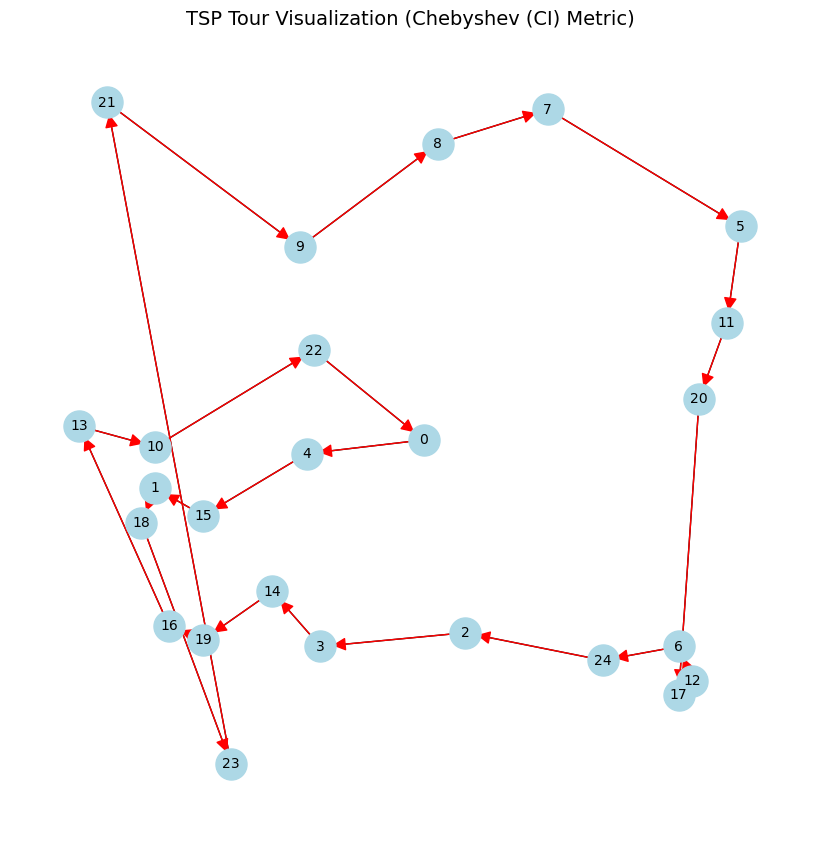

In [41]:
visualize_tsp(coordinates_list, tour, metric="Chebyshev (CI)")